In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
adolecentFertility = pd.read_csv('/content/1697066047286-AdolescentFertility.csv',encoding='UTF-8-sig',sep=',')
adolecentFertility.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,106.2062,102.8116,99.417,94.4542,89.4914,84.5286,79.5658,74.603,...,30.6520,29.5820,28.512,27.3444,26.1768,25.0092,23.8416,22.674,21.1736,19.6732
1,Afghanistan,AFG,145.2450,145.2450,145.245,145.2450,145.2450,145.2450,145.2450,145.245,...,113.7150,107.2560,100.797,94.4290,88.0610,81.6930,75.3250,68.957,65.1410,61.3250
2,Angola,AGO,202.2000,204.6000,207.000,209.4000,211.8000,214.2000,216.6000,219.000,...,172.9316,170.1658,167.400,164.0252,160.6504,157.2756,153.9008,150.526,147.9580,145.3900
3,Albania,ALB,54.4408,56.1654,57.890,55.3680,52.8460,50.3240,47.8020,45.280,...,19.8208,20.2754,20.730,20.5124,20.2948,20.0772,19.8596,19.642,19.5724,19.5028
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
infantMortality = pd.read_csv('/content/1697066054236-Mortality.csv',encoding='UTF-8-sig',sep=',')
infantMortality.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,344.6,338.7,333.1,327.6,322.0,316.8,...,87.6,83.9,80.3,76.8,73.6,70.4,67.6,64.9,62.5,60.3
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.3,112.3,105.0,98.6,93.0,88.2,84.2,80.6,77.7,74.7
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.2,12.1,11.2,10.4,9.9,9.6,9.4,9.4,9.5,9.7
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.1,3.9,3.7,3.5,3.4,3.2,3.1,3.0


In [128]:
adolecentFertilityMexico = adolecentFertility.loc[adolecentFertility['Country Name']=='Mexico']
adolecentFertilityMexico = adolecentFertilityMexico.drop(['Country Code'],axis=1)
adolecentFertilityMexico = adolecentFertilityMexico.set_index('Country Name')
adolecentFertilityMexico = adolecentFertilityMexico.T
adolecentFertilityMexico.columns = ['Fertility']
adolecentFertilityMexico.index.name = 'Year'
adolecentFertilityMexico.reset_index(inplace=True)
adolecentFertilityMexico.head()

,Year,Fertility
0,1960,116.4508
1,1961,116.6804
2,1962,116.9100
3,1963,116.9100
4,1964,116.9100


In [129]:
infantMortalityMexico = infantMortality.loc[infantMortality['Country Name']=='Mexico']
infantMortalityMexico = infantMortalityMexico.drop(['Country Code'],axis=1)
infantMortalityMexico = infantMortalityMexico.set_index('Country Name')
infantMortalityMexico = infantMortalityMexico.T
infantMortalityMexico.columns = ['Mortality']
infantMortalityMexico.index.name = 'Year'
infantMortalityMexico.reset_index(inplace=True)
infantMortalityMexico.head()

,Year,Mortality
0,1960,155.8
1,1961,149.3
2,1962,143.3
3,1963,137.9
4,1964,132.7


In [130]:
analisysDf = pd.merge(left=adolecentFertilityMexico,right=infantMortalityMexico,left_on='Year',right_on='Year')
analisysDf.set_index('Year',inplace=True)
analisysDf.head()

,Fertility,Mortality
Year,,
1960,116.4508,155.8
1961,116.6804,149.3
1962,116.9100,143.3
1963,116.9100,137.9
1964,116.9100,132.7


Text(0, 0.5, 'Rate x 1000')

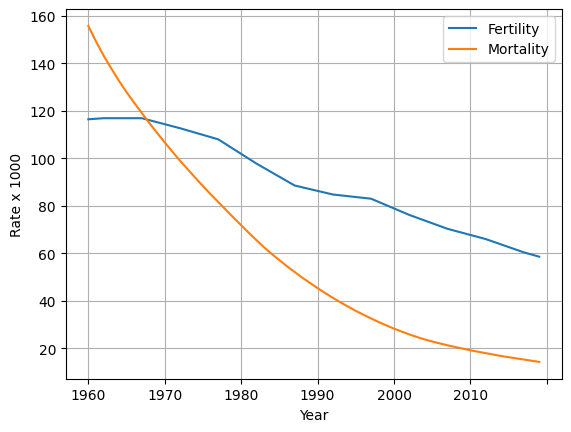

In [131]:
analisysDf.plot()
plt.grid()
plt.ylabel('Rate x 1000')

In [132]:
countries = ('Mexico','Canada','United States')
columns = ['Country Name','2019']
adolecentFertilityNorthAmerica = adolecentFertility[adolecentFertility['Country Name'].isin(countries)][columns]
adolecentFertilityNorthAmerica.columns = ['Country Name','Fertility']
adolecentFertilityNorthAmerica.head()


,Country Name,Fertility
33,Canada,7.6822
152,Mexico,58.5434
249,United States,17.2524


In [133]:
countries = ('Mexico','Canada','United States')
columns = ['Country Name','2019']
infantMortalityNorthAmerica = infantMortality[infantMortality['Country Name'].isin(countries)][columns]
infantMortalityNorthAmerica.columns = ['Country Name','Mortality']
infantMortalityNorthAmerica.head()


,Country Name,Mortality
33,Canada,4.9
152,Mexico,14.2
249,United States,6.5


In [134]:
analisysDf2 = pd.merge(left=adolecentFertilityNorthAmerica,right=infantMortalityNorthAmerica,left_on='Country Name',right_on='Country Name')
analisysDf2.set_index('Country Name',inplace=True)
analisysDf2.head()

,Fertility,Mortality
Country Name,,
Canada,7.6822,4.9
Mexico,58.5434,14.2
United States,17.2524,6.5


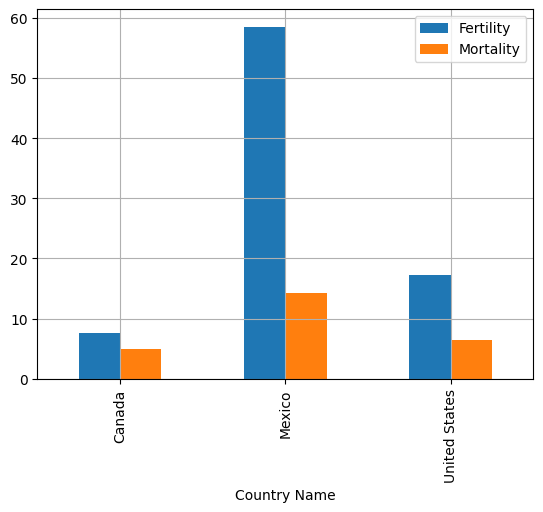

In [142]:
analisysDf2[['Fertility','Mortality']].plot(kind='bar')
plt.grid()


(array([144.,  45.,  23.,  20.,   7.]),
 array([  1.7,  24.8,  47.9,  71. ,  94.1, 117.2]),
 <BarContainer object of 5 artists>)

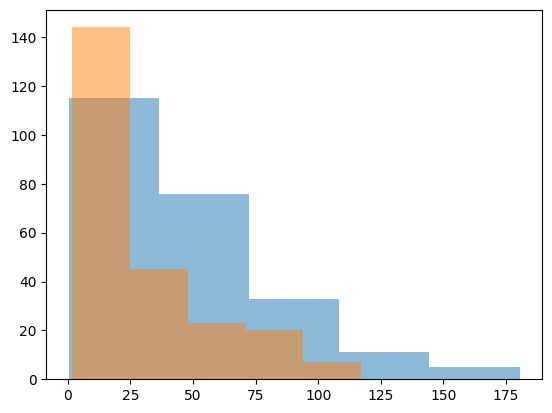

In [148]:
plt.hist(adolecentFertility['2019'],bins=5,alpha=0.5)
plt.hist(infantMortality['2019'],bins=5,alpha=0.5)

<Axes: >

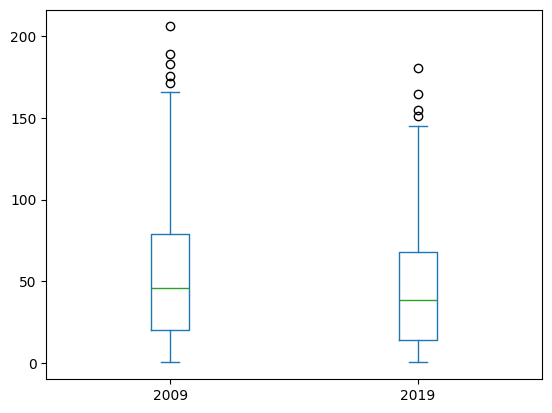

In [149]:
adolecentFertility[['2009','2019']].plot.box()

<Axes: >

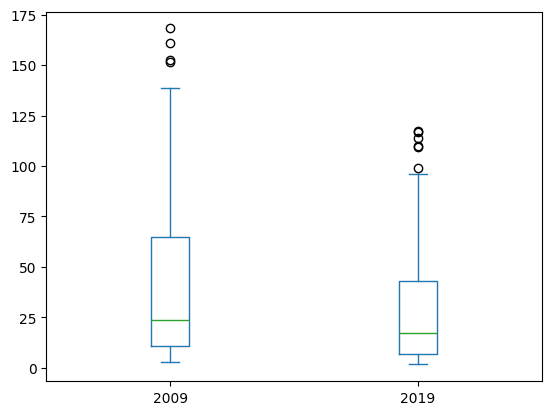

In [150]:
infantMortality[['2009','2019']].plot.box()

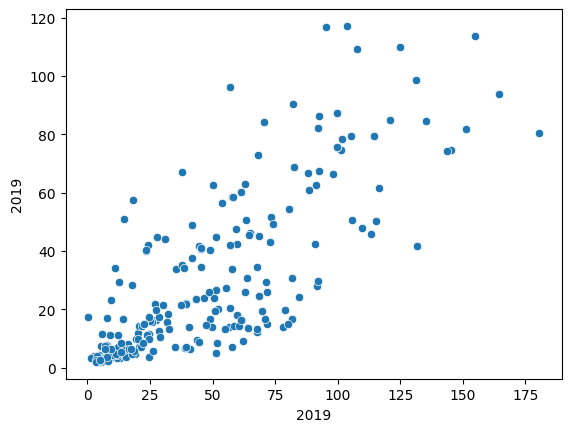

In [152]:
splot = sns.scatterplot(x=adolecentFertility['2019'],y=infantMortality['2019'])


In [154]:
corr = adolecentFertility['2019'].corr(infantMortality['2019'])
corr

np.float64(0.7860446246960763)